In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("air_pollution_data.csv")
df

,city,date,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,Ahmedabad,30-11-2020,5,520.71,2.38,16.28,130.18,47.68,65.96,72.13,8.36
1,Ahmedabad,01-12-2020,5,1682.28,7.71,54.84,0.73,21.70,120.95,154.53,27.36
2,Ahmedabad,02-12-2020,5,1815.80,16.54,49.35,0.17,23.84,133.47,172.63,28.12
3,Ahmedabad,03-12-2020,5,2296.45,41.57,40.10,0.00,35.76,150.37,202.15,36.48
4,Ahmedabad,04-12-2020,5,2189.64,23.92,58.95,0.02,28.13,160.79,205.80,40.53
...,...,...,...,...,...,...,...,...,...,...,...
23499,Visakhapatnam,21-05-2023,3,353.81,0.00,2.08,100.14,4.11,37.53,47.09,0.08
23500,Visakhapatnam,22-05-2023,3,380.52,0.00,3.77,82.97,5.07,32.17,43.44,1.74
23501,Visakhapatnam,23-05-2023,3,390.53,0.00,4.28,80.11,5.19,36.01,48.06,1.20
23502,Visakhapatnam,24-05-2023,3,300.41,0.00,1.36,95.84,2.21,30.17,48.89,0.00


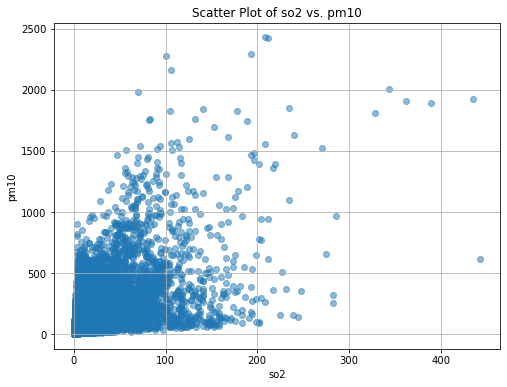

In [3]:
# A1 

import matplotlib.pyplot as plt

feature1 = "so2"
feature2 = "pm10"

plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2], alpha=0.5)
plt.title(f"Scatter Plot of {feature1} vs. {feature2}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.grid(True)
plt.show()

In [6]:
# A2 & A3

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Choose the independent and dependent variables
independent_variable = "so2"  # You can replace this with your actual feature names
dependent_variable = "pm10"

# Split the data into training and testing sets
X = df[[independent_variable]]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 18458.97
